In [33]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})


In [40]:
def read_xyz(xyz):
    coordlist=[]
    with open(xyz,'r') as inp:
        i=0
        for line in inp:  
            if (i==1):
                try:
                    en0=float(line.strip().split(' ')[-1])
                except:
                    en0=-1
            if i>=2:
                splitline=line.split()
                coordlist.append(splitline[1:4])
            i+=1
    return (np.array(coordlist).astype(float),en0)

def write_xyz(coordlist,name):
    with open(name,'w') as f:
        f.write(str(len(coordlist))+'\n#\n')
        for cd in coordlist:
            f.write('C '+str(cd[0])+' '+str(cd[1])+' '+str(cd[2])+'\n')
    
def write_xyz_stack(path,filenamearray):
    with open(path+'xyz_stack.xyz','w') as f:
        for file in filenamearray:
            cl=read_xyz(file)
            f.write(str(len(cl))+'\n'+filename+'\n')
            for coords in cl:
                f.write('C '+str(coords[0])+' '+str(coords[1])+' '+str(coords[2])+'\n')
        

In [50]:
## read xyz files ##
path='tests_small/'
file2=path+'relaxed_new.xyz'
filename='master.xyz'

filenamearray=[]
##loop over all master.xyz
#file1='master.xyz'
k=0
errorarray=[]
energyarray=[]
for subdir, dirs, files in sorted(os.walk(path)):
    for file in files:
        if file==filename:
            f=os.path.join(subdir, file)
            print('reading '+f)
            filenamearray.append(f)
            file1=f
            (cl1,en)=read_xyz(file1)
            (cl2,en2)=read_xyz(file2)  
            energyarray.append(en/100)
            ## get some atoms with same id (manually) ##
            same_ids=np.array([[1,8,249,229,242,17],[506,504,897,866,851,467]])
            same_ids-=1


            ## Rotate struture if necessairy ##
            xrotate=False
            if xrotate:
                ys=cl2[:,1]*np.cos(3.1415)-cl2[:,2]*np.sin(3.1415)
                zs=cl2[:,1]*np.sin(3.1415)+cl2[:,2]*np.cos(3.1415)

                cl2[:,1]=ys
                cl2[:,2]=zs

            ## calculate translation vector from correlated atoms ##    
            vec=np.zeros(3)
            for i in range(len(same_ids[0])):
                vec+=(cl1[same_ids[0,i]]-cl2[same_ids[1,i]])
            vec/=i+1

            ## apply translation ##
            cl2+=vec



            ## correlate all atoms ##
            ids=[]
            for coords in cl1:
                diff=np.sqrt(np.sum((coords-cl2)**2,axis=1))
                d=diff[np.argmin(diff)]
                ids.append(np.argmin(diff))


            ## calculate and apply translation of all correlated atoms ##
            ## this finetunes the translation ##
            vec=np.zeros(3)
            for i in range(len(cl1)):
                vec+=(cl1[i]-cl2[ids[i]])
            vec/=i+1
            cl2+=vec

            ## calculate difference ##

            totdiff=0
            for i in range(len(cl1)):
                totdiff+=np.sqrt(np.sum((cl1[i]-cl2[ids[i]])**2))
            er=totdiff/len(cl1)
            print(er)
            errorarray.append(er)

            ## write new xyz ##
            #write_xyz(cl2,path+'relaxed_shifted'+str(k)+'.xyz')
            #k+=1
    
#write_xyz_stack(path,filenamearray)

reading tests_small/master.xyz
0.2217013971479633
reading tests_small/001/master.xyz
0.21710526560859703
reading tests_small/003/master.xyz
0.20920676906092311
reading tests_small/005/master.xyz
0.20247661291673327
reading tests_small/007/master.xyz
0.1966082160688876
reading tests_small/010/master.xyz
0.18913477639140605
reading tests_small/015/master.xyz
0.1794309397275116
reading tests_small/020/master.xyz
0.17185051670836726
reading tests_small/030/master.xyz
0.1604941276626667
reading tests_small/040/master.xyz
0.1515842576032425
reading tests_small/050/master.xyz
0.14374783814149858
reading tests_small/060/master.xyz
0.13640343342852382
reading tests_small/070/master.xyz
0.12938029269950313
reading tests_small/080/master.xyz
0.12300243234358188
reading tests_small/082/master.xyz
0.12192585205798787
reading tests_small/087/master.xyz
0.1200354659534454
reading tests_small/090/master.xyz
0.12013538897557555
reading tests_small/092/master.xyz
0.12145203712099381
reading tests_small/

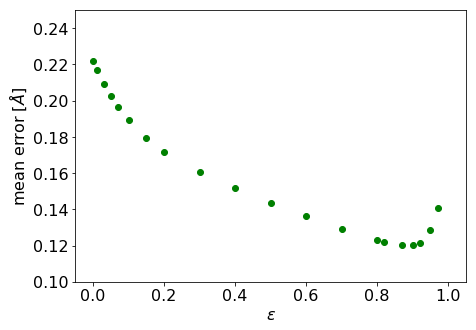

In [54]:
plt.figure(figsize=(7,5))
plt.plot(energyarray,errorarray,'go')
plt.ylabel('mean error [$\AA$]')
plt.xlabel('$\epsilon$')
plt.ylim(0.1,0.25)
plt.savefig('error.svg')

plt.show()

In [30]:
cl2

array([[ -9.16839293,  66.25752236,  -0.46235224],
       [ -9.52485293,  64.88608362,  -0.55662518],
       [ -8.51529293,  63.88748479,  -0.54393265],
       ...,
       [ 69.45690707, -11.66515211,  -1.26253243],
       [ 67.73313707, -13.40933619,  -1.09057083],
       [ 69.10047707, -13.03654429,  -1.17800537]])